# Варіант 18

## Хiд виконання роботи:
1. Початковi 2D-данi представити графiчно.
2. Розбити данi на навчальний, перевiрочний та тестовий набори. Перевiрочний набiр використати для налаштування гiперпараметрiв. Тестовий набiр вико- ристати для остаточної оцiнки якостi моделей.
3. Побудувати ансамблi моделей згiдно з варiантом. В ансамблях Bagging, RandomForest, ExtraTrees, AdaBoost, GradientBoosting:

- В якостi base_estimator / estimators використати одну/ кiлька моделей iз параметрами по умовчанню: дерев рiшень, логiстичної регресiї, svm тощо.

- Побудувати графiки залежностi значень показника якостi ансамбля та iндивiдуальної моделi вiд n_estimators на однiй координатнiй вiсi. Такий графiк для iндивiдуальної моделi, очевидно, буде горизонтальною прямою. В задачах класифiкацiї в якостi показника якостi можна обрати accuracy_score, f1_score або zero_one_loss. В задачах регресiї показником якостi можна обрати R2, MAPE або RMSE.

- Оцiнити якiсть ансамблю на основi прикладiв oob (для ансамблiв на основi беггiнгу).

4. В задачах класифiкацiї навести приклад границi рiшень decision boundaries на основi окремої моделi та ансамблю. Побудувати графiки на однiй координатнiй площинi (для регресiї):
- прогнозiв на основi ансамблю,
- прогнозiв на основi окремої моделi base_estimator / estimators,
- точок даних з перевiрочної / тестової множин.

5. Розрахувати значення змiщення та дисперсiї для окремої моделi та ансамблю.

6. Що можна сказати про час навчання ансамблю порiвняно з окремими моделями, якi утворюють цi ансамблi?

7. Зробити висновки. Чи краще на заданих даних виконується ансамбль порiвняно з iндивiдуальними моделями?

## Індивідуальне завдання:
AdaBoostRegressor. Розглянути рiзнi значення параметрiв n_estimators,
learning_rate та loss.

In [16]:
# код для центрування графіків
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## 1. Візуалізація даних

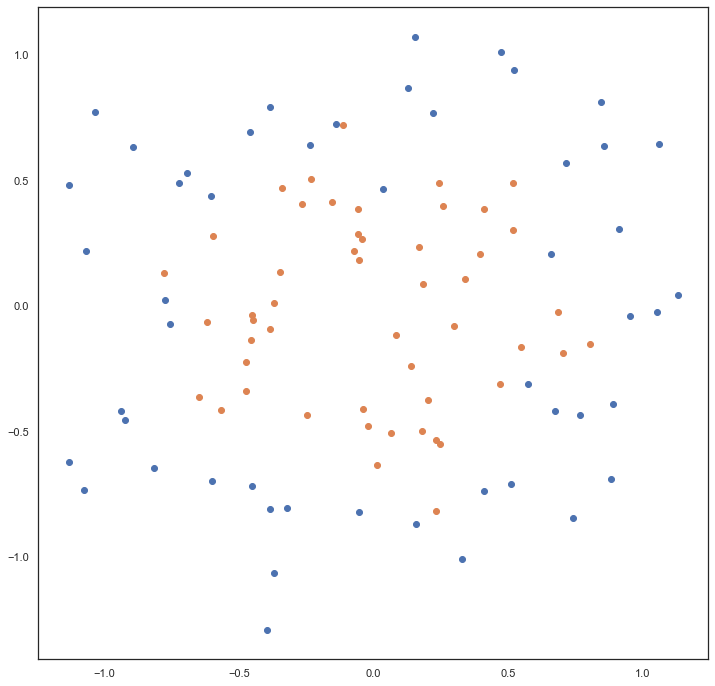

In [17]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np 

X, y = make_circles(noise = 0.2, factor = 0.5, random_state = 1)

first_class  = np.where(y == 0)
second_class = np.where(y == 1)

plt.figure(figsize=(12, 12))
plt.scatter(X[first_class][:, 0],  X[first_class][:, 1]);
plt.scatter(X[second_class][:, 0], X[second_class][:, 1]);

## 2. Розділеня даних на навчальний, перевiрочний та тестовий набори

В нашому наборі 100 об'єктів. 70 використаємо для навчального набору, 15 - для валідаційного, 15 для тестового. Не будемо використовувати функцію train_test_split, натомість перемішаємо дані та виділимо відповідні набори.  

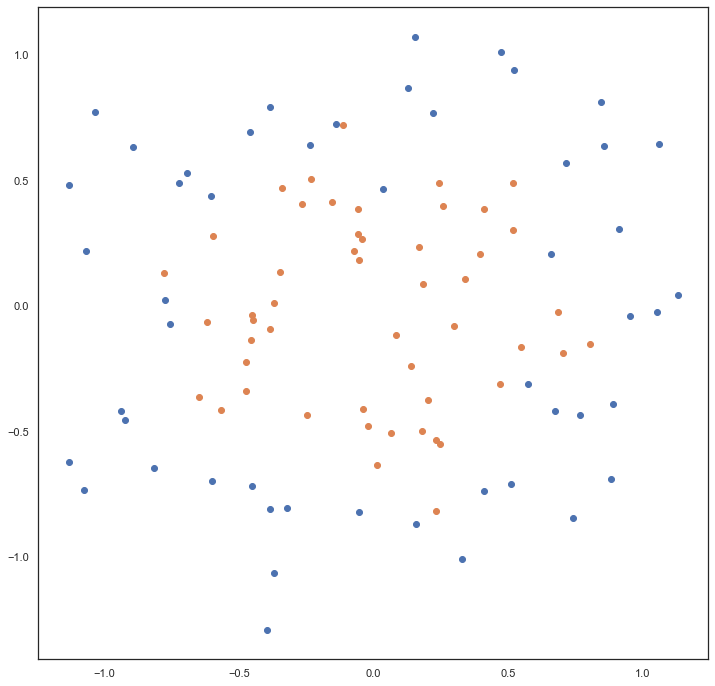

In [18]:
data = np.concatenate((X, y[:, np.newaxis]), axis = 1)

np.random.seed(42)
np.random.shuffle(data)

X_shuffled = data[:, :2]
y_shuffled = data[:, 2]

#перевіримо чи не змінилась візуалізція даних
first_class  = np.where(y_shuffled == 0)
second_class = np.where(y_shuffled == 1)

plt.figure(figsize=(12, 12))
plt.scatter(X_shuffled[first_class][:, 0],  X_shuffled[first_class][:, 1]);
plt.scatter(X_shuffled[second_class][:, 0], X_shuffled[second_class][:, 1]);

Як бачимо, візуалізація не змінилась. Тепер розділимо дані

In [19]:
X_train, y_train = X_shuffled[:70],   y_shuffled[:70]
X_val, y_val     = X_shuffled[70:85], y_shuffled[70:85]
X_test, y_test   = X_shuffled[85:],   y_shuffled[85:]

print(X_train.shape, "  ", y_train.shape)
print(X_val.shape, "  ",   y_val.shape)
print(X_test.shape, "  ",  y_test.shape)

(70, 2)    (70,)
(15, 2)    (15,)
(15, 2)    (15,)


## 3. Навчання моделей

В якості base_estimator в моделі AdaBoostClassifier виберемо LogisticRegression з параметрами по умовчанню. Навчимо 5 моделей AdaBoostClasifier з такими параметрами n_estimators: 25, 50, 75, 100, 150, поміcтимо їх в словник adaboost_models. Також навчимо модель LogisticRegression для порівняння результатів класифікації.

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

# навчання моделей AdaBoostClassifier
n_estimators = [25, 50, 75, 100, 150]
adaboost_models = {}

for key in n_estimators:
    adaboost_models[str(key)] = AdaBoostClassifier(estimator = LogisticRegression(),
                                                   n_estimators = key).fit(X_train, y_train)


Запишемо результати кластеризації моделей AdaBoostClassifier на навчальному та валідаційному наборі в словник adaboost_results

In [21]:
adaboost_results = {}

for key in adaboost_models.keys():
    
    adaboost_results[key] = {}
    adaboost_results[key]["train"] = adaboost_models[key].predict(X_train)
    adaboost_results[key]["val"] = adaboost_models[key].predict(X_val)

Також збережемо результати кластеризації для моделі LogisticRegression

In [22]:
log_reg_train = log_reg.predict(X_train)
log_reg_val   = log_reg.predict(X_val)

У якості метрики классифікації виберемо f1_score. Зобразимо значення цієї метрики для різних моделей графічно, згідно з завданням.  

In [23]:
from sklearn.metrics import f1_score
import seaborn as sns

def metrics_visualisation(models_results, base_estimator_res, set_key):
    
    global y_train
    global y_val
    
    if set_key == "train":
        y_true = y_train
        title = "навчальний набір"
    elif set_key == "val":
        y_true = y_val
        title = "валідаційний набір"
        
    #результати моделей AdaBoostClassifier
    metrics = {}
    for key in models_results.keys():
        metrics[key] = f1_score(y_true, models_results[key][set_key])
    
    points = []
    for key in models_results.keys():
        points.append([int(key), metrics[key]])
    
    points = np.array(points) 
    
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.set_style("white")
    
    plot = sns.lineplot(x = points[:, 0], y = points[:, 1], legend = "brief", label = "AdaBoostClassifier");
        
    x_ticks = [int(i) for i in list(models_results.keys())]
    plot.set_xticks(x_ticks)
    plot.set(title=title)
    plot.set(xlabel='n_estimators', ylabel='f1_score')
    
    #результати моделі LogisticRegression
    estimator_f1 = f1_score(y_true, base_estimator_res)
    sns.lineplot(x = [x_ticks[0], x_ticks[-1]], y = [estimator_f1, estimator_f1],  legend = "brief", label = "LogisticRegression");
    
    print()
    
    print("n_estimators   f1")
    for key in metrics.keys():
        print(f"{key}            {round(metrics[key], 3)}")
        
    print()
    print(f"log_reg       {round(estimator_f1, 3)}")


n_estimators   f1
25            0.747
50            0.742
75            0.75
100            0.75
150            0.75

log_reg       0.733


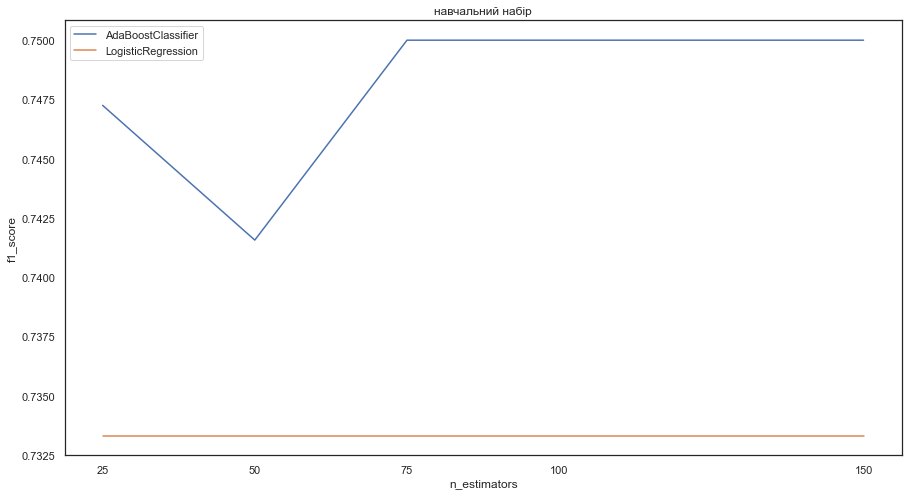

In [24]:
metrics_visualisation(adaboost_results,log_reg_train, set_key = "train")


n_estimators   f1
25            0.632
50            0.556
75            0.556
100            0.556
150            0.556

log_reg       0.632


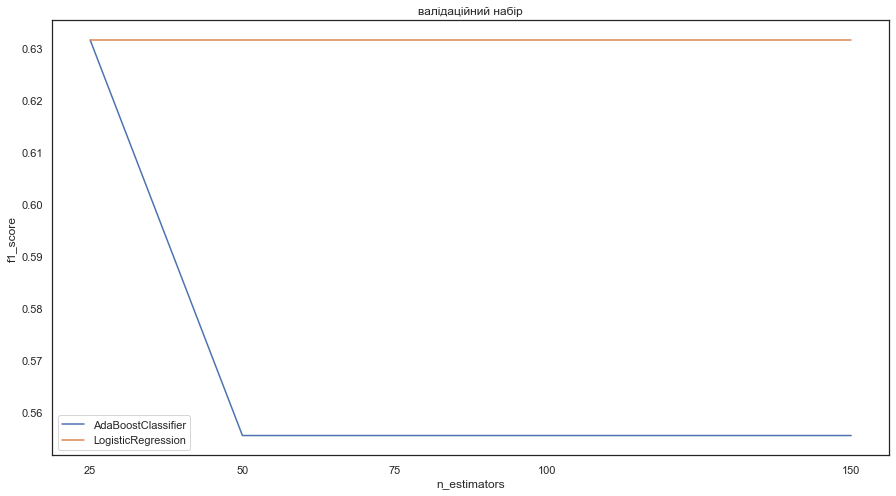

In [25]:
metrics_visualisation(adaboost_results,log_reg_val, set_key = "val")

Бачимо, що ансамбль на навчальному наборі працює краще, а на валідаційному гірше ніж одна модель, певно, має місце перенавчання, тому спробуємо зменшити параметри n_samples, наприклад до 3, 5, 7, 10, 20, 21, 22, 23, 24

In [26]:
n_estimators_2 = [3, 5, 7, 10, 20, 21, 22, 23, 24]
adaboost_models_2 = {}

for key in n_estimators_2:
    adaboost_models_2[str(key)] = AdaBoostClassifier(estimator = LogisticRegression(),
                                                     n_estimators = key).fit(X_train, y_train)
adaboost_results_2 = {}

for key in adaboost_models_2.keys():
    
    adaboost_results_2[key] = {}
    adaboost_results_2[key]["train"] = adaboost_models_2[key].predict(X_train)
    adaboost_results_2[key]["val"] = adaboost_models_2[key].predict(X_val)


n_estimators   f1
3            0.704
5            0.704
7            0.71
10            0.731
20            0.753
21            0.753
22            0.753
23            0.761
24            0.747

log_reg       0.733


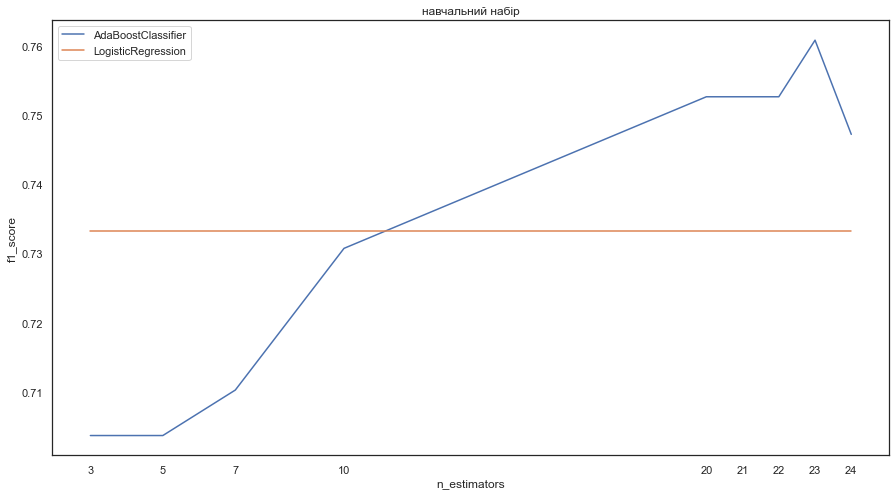

In [27]:
metrics_visualisation(adaboost_results_2,log_reg_train, set_key = "train")


n_estimators   f1
3            0.636
5            0.636
7            0.636
10            0.6
20            0.632
21            0.632
22            0.632
23            0.632
24            0.632

log_reg       0.632


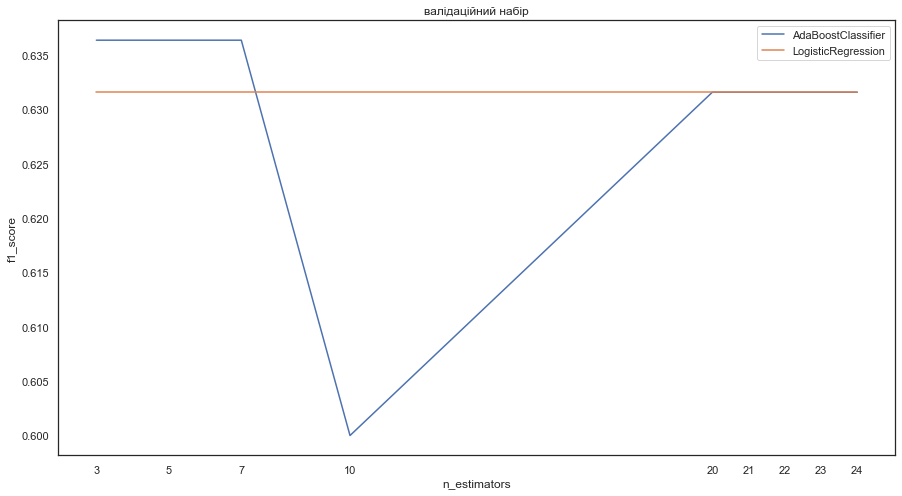

In [28]:
metrics_visualisation(adaboost_results_2,log_reg_val, set_key = "val")

Як бачимо, найкращий результат на навчальному наборі дає модель AdaBoostClassifier з параметром n_estimators = 23. А найкращий результат на валідаційному наборі дають моделі AdaBoostClassifier з параметром n_estimators = 3, 5, 7

Серед моделей AdaBoostClassifier з параметром n_estimators = 3, 5, 7 найкращий результат дає модель з параметром n_estimators = 7, тому виберемо її за фінальну

In [29]:
adaboost_final = AdaBoostClassifier(estimator = LogisticRegression(),
                                    n_estimators = 7).fit(X_train, y_train)

## 4. Границi рiшень

Наведемо границі рішень для моделі AdaBoostClassifier з параметрами n_estimators = 7, яка показала найкращі результати, а також для простої логістичної регресії

Границя рішень для AdaBoostClassier з n_estimators = 7:

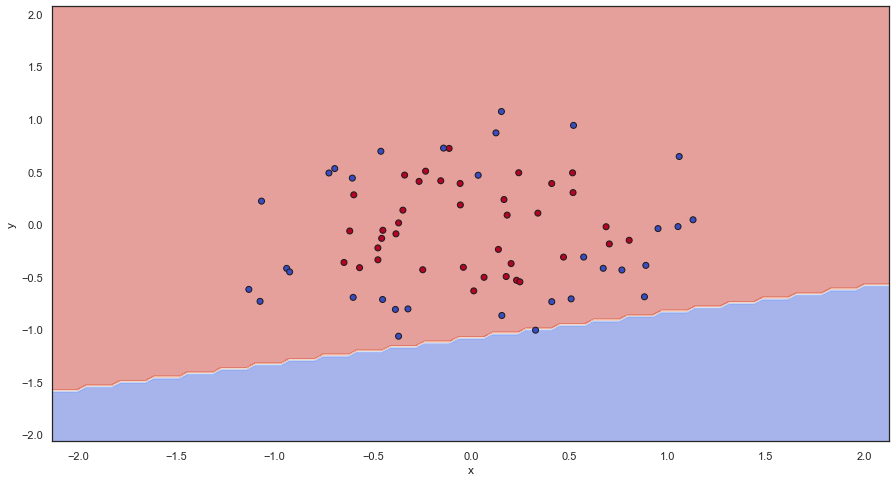

In [30]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(adaboost_models_2["7"], 
                                              X_train, 
                                              response_method="predict",
                                              xlabel= "x", ylabel="y",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

disp.ax_.scatter(X_train[:, 0], X_train[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm);

Границя рішень для LogisticRegression:

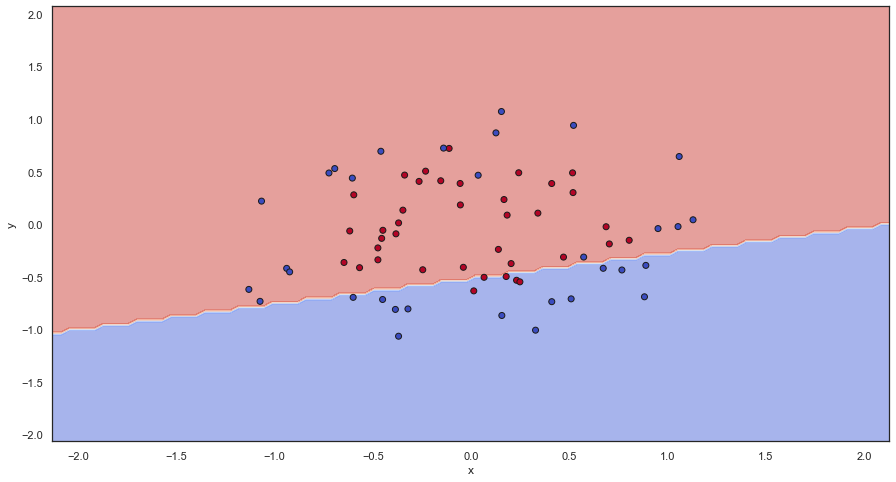

In [31]:
disp = DecisionBoundaryDisplay.from_estimator(log_reg, 
                                              X_train, 
                                              response_method="predict",
                                              xlabel= "x", ylabel="y",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

disp.ax_.scatter(X_train[:, 0], X_train[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm);

## 5. Час навчання

Збільшимо розмір датасету до 100000 та порівняємо час навчання для моделей AdaBoostClassifier з параметрами n_estimators = 7, 20, 50, 70, 100, 150. Зробимо графік аналогічний до того, який був у 3 пункті, але замість f1_score в ньому буде час навчання.

In [32]:
import time

X_time, y_time = make_circles(noise = 0.2, factor = 0.5, random_state = 1, n_samples = 100000)

log_reg_ = LogisticRegression()

start = time.time()
log_reg_.fit(X_time, y_time);
end = time.time()
log_reg_time = end - start


# навчання моделей AdaBoostClassifier
n_estimators_time = [7, 20, 50, 70, 100, 150]
models = {}
models_time = {}

for key in n_estimators_time:
    start = time.time()
    models[str(key)] = AdaBoostClassifier(estimator = LogisticRegression(),
                                          n_estimators = key).fit(X_time, y_time)
    end = time.time()
    models_time[str(key)] = end - start

Тепер зробимо графік

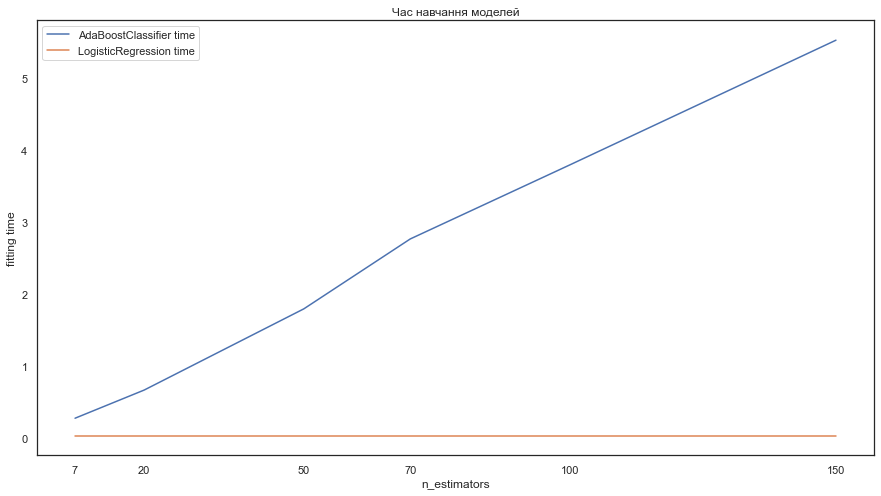

In [33]:
points = []

for key in models_time.keys():
    points.append([int(key), models_time[key]])

points = np.array(points)

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")
    
plot = sns.lineplot(x = points[:, 0], y = points[:, 1], legend = "brief", label = "AdaBoostClassifier time");
        
x_ticks = [int(i) for i in list(models_time.keys())]
plot.set_xticks(x_ticks)
plot.set(title = "Час навчання моделей")
plot.set(xlabel='n_estimators', ylabel='fitting time')
    
#результати моделі LogisticRegression
sns.lineplot(x = [x_ticks[0], x_ticks[-1]], y = [log_reg_time, log_reg_time],  legend = "brief", label = "LogisticRegression time");
    

Як бачимо час навчання моделей AdaBoostClassifier більший ніж час навчання моделі LogisticRegression, при чому по мірі збільшення параметру n_estimators час навчання AdaBoostClassifier зільшується.

## 6. Фінальні результати моделей

In [34]:
log_reg = LogisticRegression().fit(X_train, y_train)

log_reg_pred   =  log_reg.predict(X_test)
ada_boost_pred = adaboost_final.predict(X_test)

print(f"AdaBoostClassifier:   {round(f1_score(y_test, ada_boost_pred), 5)}")
print(f"LogisticRegression:   {round(f1_score(y_test, log_reg_pred), 5)}")

AdaBoostClassifier:   0.52632
LogisticRegression:   0.52632


Як бачимо обидві моделі дали однакові результати метрик, це можна пояснити досить малим розміром тестової вибірки

# Висновок

У ході даної лабораторної роботи було розглянуто ансамблеву модель AdaBoostClassifier. У ролі estimator було вибрано логістичну регресію. Було показано, що для параметру n_estimators = 7 досягається найраще значення метрики F1 серед всіх розглянутих моделей. Для цього датасету краще себе показала саме ансамблева модель. Також було показано, як змінюється час навчання моделей зі збільшенням параметру n_estimators. 